In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
w = np.array([1,0,0,0]) 
x = np.array([4,3,6])
y = np.array([2,-2,3])
z = np.array([1,0,-3])
r = np.array([4,2,3])
train_list = [{0:x}, {1:y}, {1:z}, {0:r}]


In [3]:
w_2 = np.array([1,0,0]) 
a = np.array([0,0])
b = np.array([0,1])
c = np.array([1,0])
d = np.array([1,1])
train_list_xor = [{0:a}, {1:b}, {1:c}, {0:d}]
train_list_or = [{0:a}, {1:b}, {1:c}, {1:d}]
train_list_and = [{0:a}, {0:b}, {0:c}, {1:d}]

In [47]:
def classify(w,x,show_process=False):
    if show_process: print(f"\t dot of {w}, {x} : {np.dot(w, x)}")
    if np.dot(w, x) >= 0:
        return 1
    else:
        return 0

In [5]:
def update_weights(w, x, change, b = 1):
    return w + b*change*x

In [37]:
def plot_perceptron(w, points=[(0,0),(0,1),(1,0),(1,1)]):
    if len(w) == 3: # 2d plot for x-y
        w0, w1, w2 = w
        print(f"({w0}) + ({w1})x + ({w2})y = 0")
        if w2==0:
            if w1 == 0:
                print("This equation:\t {w0} = 0 \t is not a line \n")
                return
            else:
                x = -(w0/w1)
                y = np.linspace(-0.5, 1.5, 100)
        else:
            x = np.linspace(-0.5, 1.5, 100)
            y = (-w1/w2)*x + (-w0/w2)
        plt.plot(x,y)
        for point in points:
            xp, yp = point
            plt.scatter(xp, yp, color='purple')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Plot of ({w0}) + ({w1})x + ({w2})y = 0')
        plt.grid(True)
        plt.show()
            
    else:
        print("I can only plot for 2 dimensions x-y")

In [36]:
def train_perceptron(w_start, train_list, b = 1, plot=True, show_process=True):
    w = w_start
    i = 0 
    counter = 0 # number of consecutive 
    while(counter < len(train_list) and i < 100): # until there are not wrong classifications or i = 100  
        if show_process: print(f"{i+1} Step:")
        u = train_list[i%len(train_list)] # in order to circularly use the next vector
        for y, x in u.items(): # y is the class, x is the vector
            break
        if show_process: print(f"\t Class: y = {y}, Vector: x = {x}")
        x = np.insert(x, 0, 1) # extend the vector
        
        # Classification
        f = classify(w,x,show_process)
        if(f==y):
            if show_process: print('\t Correctly classified')
            counter += 1 # one more correct classification
        else:
            if show_process: print(f'\t Classified in class {f} whereas it is in class {y}')
            counter = 0 # we need to update the weights
        
        # Update 
        w = update_weights(w, x, y - f, b)
        if show_process: print(f"\t w = {w}\n")
        i += 1 # next 
    # plot and return value of weight vector w
    plot_perceptron(w)
    return w
        


In [41]:
train_perceptron(w,train_list)


1 Step:
	 Class: y = 0, Vector: x = [4 3 6]
	 dot of [1 0 0 0], [1 4 3 6] : 1
	 Classified in class 1 whereas it is in class 0
	 w = [ 0 -4 -3 -6]

2 Step:
	 Class: y = 1, Vector: x = [ 2 -2  3]
	 dot of [ 0 -4 -3 -6], [ 1  2 -2  3] : -20
	 Classified in class 0 whereas it is in class 1
	 w = [ 1 -2 -5 -3]

3 Step:
	 Class: y = 1, Vector: x = [ 1  0 -3]
	 dot of [ 1 -2 -5 -3], [ 1  1  0 -3] : 8
	 Correctly classified
	 w = [ 1 -2 -5 -3]

4 Step:
	 Class: y = 0, Vector: x = [4 2 3]
	 dot of [ 1 -2 -5 -3], [1 4 2 3] : -26
	 Correctly classified
	 w = [ 1 -2 -5 -3]

5 Step:
	 Class: y = 0, Vector: x = [4 3 6]
	 dot of [ 1 -2 -5 -3], [1 4 3 6] : -40
	 Correctly classified
	 w = [ 1 -2 -5 -3]

6 Step:
	 Class: y = 1, Vector: x = [ 2 -2  3]
	 dot of [ 1 -2 -5 -3], [ 1  2 -2  3] : -2
	 Classified in class 0 whereas it is in class 1
	 w = [ 2  0 -7  0]

7 Step:
	 Class: y = 1, Vector: x = [ 1  0 -3]
	 dot of [ 2  0 -7  0], [ 1  1  0 -3] : 2
	 Correctly classified
	 w = [ 2  0 -7  0]

8 Step:
	

array([ 2,  0, -7,  0])

1 Step:
	 Class: y = 0, Vector: x = [0 0]
	 dot of [1 0 0], [1 0 0] : 1
	 Classified in class 1 whereas it is in class 0
	 w = [-1  0  0]

2 Step:
	 Class: y = 1, Vector: x = [0 1]
	 dot of [-1  0  0], [1 0 1] : -1
	 Classified in class 0 whereas it is in class 1
	 w = [1 0 2]

3 Step:
	 Class: y = 1, Vector: x = [1 0]
	 dot of [1 0 2], [1 1 0] : 1
	 Correctly classified
	 w = [1 0 2]

4 Step:
	 Class: y = 1, Vector: x = [1 1]
	 dot of [1 0 2], [1 1 1] : 3
	 Correctly classified
	 w = [1 0 2]

5 Step:
	 Class: y = 0, Vector: x = [0 0]
	 dot of [1 0 2], [1 0 0] : 1
	 Classified in class 1 whereas it is in class 0
	 w = [-1  0  2]

6 Step:
	 Class: y = 1, Vector: x = [0 1]
	 dot of [-1  0  2], [1 0 1] : 1
	 Correctly classified
	 w = [-1  0  2]

7 Step:
	 Class: y = 1, Vector: x = [1 0]
	 dot of [-1  0  2], [1 1 0] : -1
	 Classified in class 0 whereas it is in class 1
	 w = [1 2 2]

8 Step:
	 Class: y = 1, Vector: x = [1 1]
	 dot of [1 2 2], [1 1 1] : 5
	 Correctly classified
	 w = [1 2 

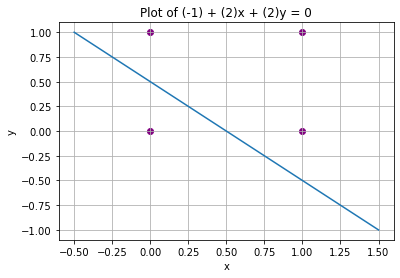

array([-1,  2,  2])

In [48]:
#train_perceptron(w_2,train_list_xor) # XOR is NOT linearly seperable problem
train_perceptron(w_2,train_list_or,2, show_process=True) # OR problem
#train_perceptron(w_2,train_list_and,5) # AND problem

In [53]:
classify(np.array([-1,  2,  2]), (1,1,1), True)

	 dot of [-1  2  2], (1, 1, 1) : 3


1